In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import os

from manager.manager import TrainingManager
from optimizers.Adasecant import AdaSecant

from utils import set_seed


Training with optimizer: AdaSecant
Epoch [1/10], Train Loss: 1.0720, Val Loss: 0.7763
Epoch [2/10], Train Loss: 0.7854, Val Loss: 0.3376
Epoch [3/10], Train Loss: 0.5406, Val Loss: 0.2616
Epoch [4/10], Train Loss: 0.5511, Val Loss: 0.2355
Epoch [5/10], Train Loss: 0.4974, Val Loss: 0.1979
Epoch [6/10], Train Loss: 0.3872, Val Loss: 0.1625
Epoch [7/10], Train Loss: 0.2889, Val Loss: 0.2230
Epoch [8/10], Train Loss: 0.3173, Val Loss: 0.2020
Epoch [9/10], Train Loss: 0.2959, Val Loss: 0.1712
Epoch [10/10], Train Loss: 0.2502, Val Loss: 0.1095

Training with optimizer: SGD_Momentum_lr01
Epoch [1/10], Train Loss: 1.0286, Val Loss: 0.9172
Epoch [2/10], Train Loss: 0.9375, Val Loss: 0.6933
Epoch [3/10], Train Loss: 0.8020, Val Loss: 0.5027
Epoch [4/10], Train Loss: 0.6518, Val Loss: 0.3696
Epoch [5/10], Train Loss: 0.5374, Val Loss: 0.2836
Epoch [6/10], Train Loss: 0.4359, Val Loss: 0.2276
Epoch [7/10], Train Loss: 0.3804, Val Loss: 0.1926
Epoch [8/10], Train Loss: 0.3317, Val Loss: 0.1701
E

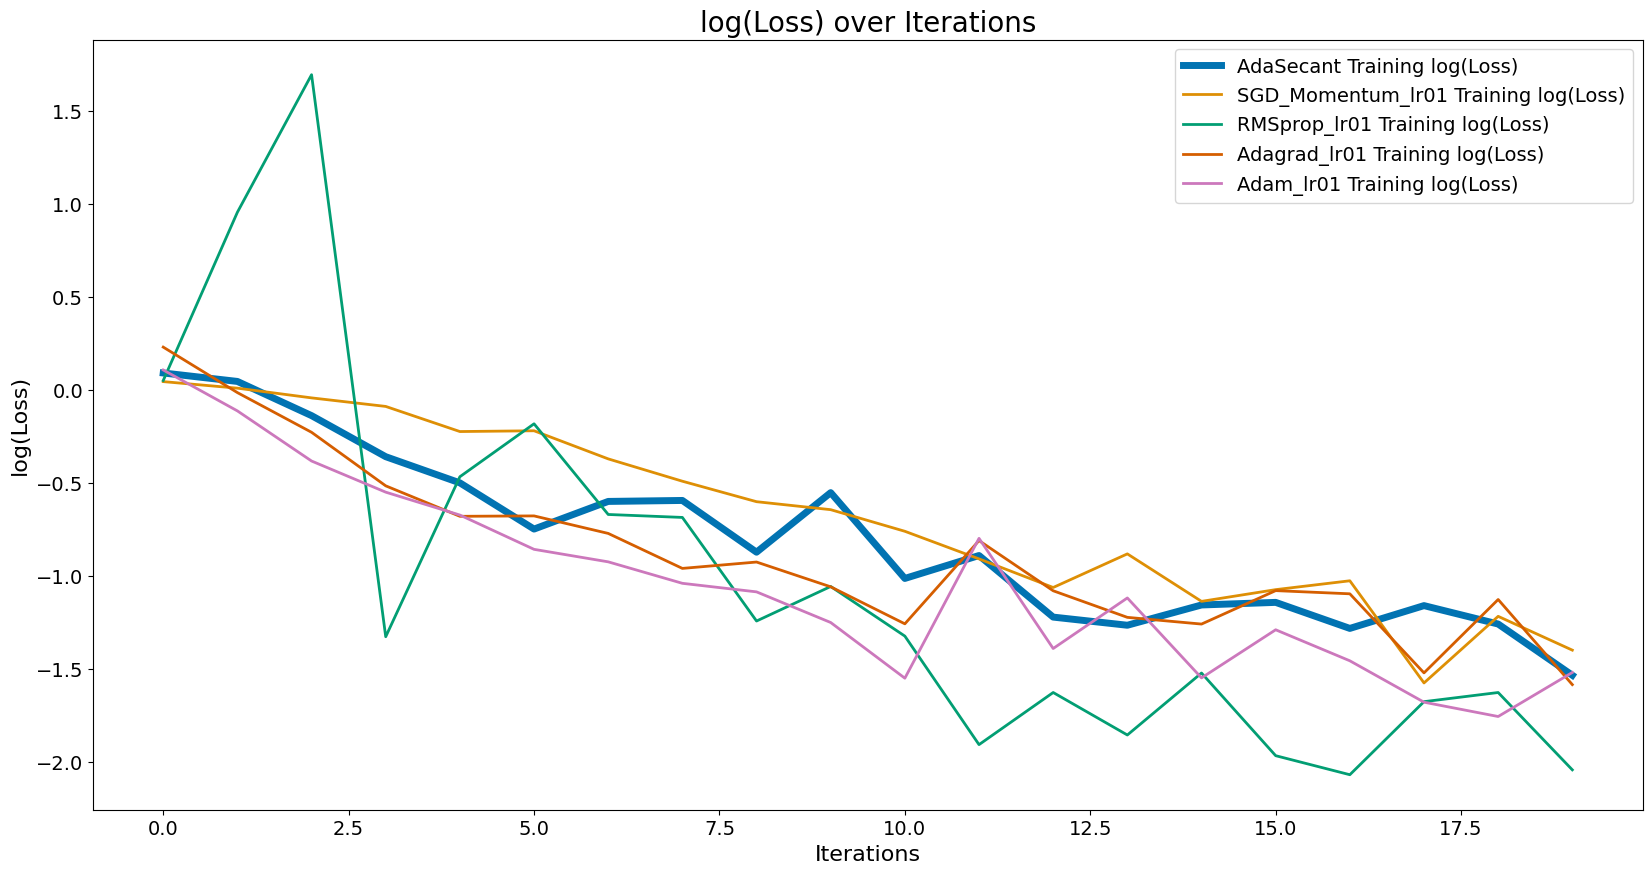

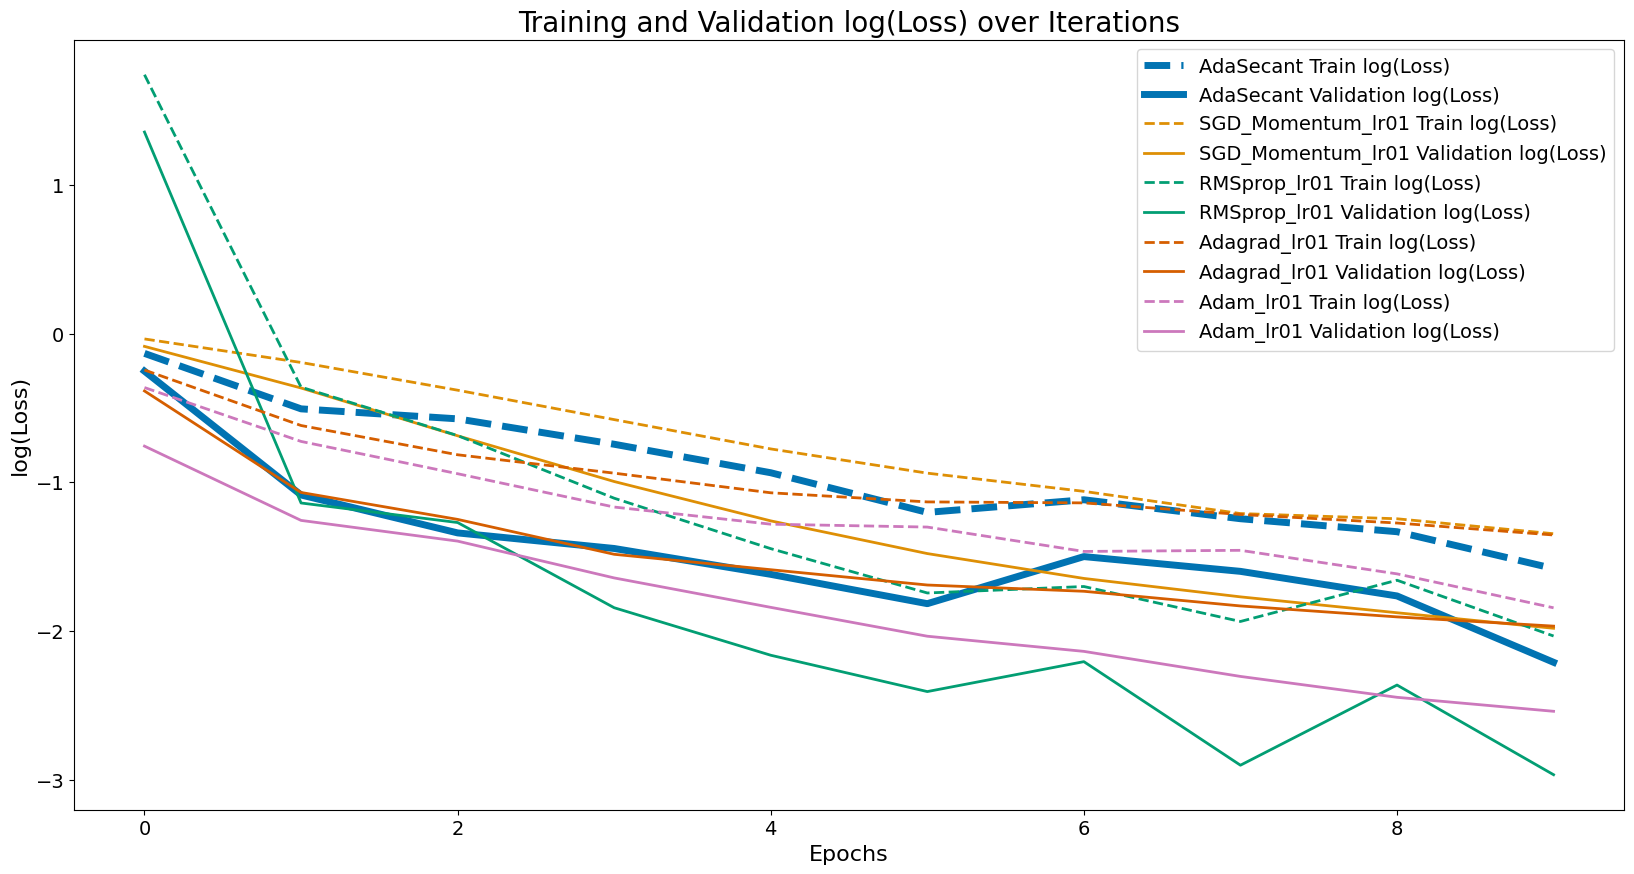

Metric of the model with AdaSecant optimizer on the test set: 82.61
Metric of the model with SGD_Momentum_lr01 optimizer on the test set: 78.26
Metric of the model with RMSprop_lr01 optimizer on the test set: 100.00
Metric of the model with Adagrad_lr01 optimizer on the test set: 82.61
Metric of the model with Adam_lr01 optimizer on the test set: 91.30


In [2]:
from models.SimplyClassNet import SimpleClassNet

set_seed(45)
experiment_path = "./experiments/iris_experiment"
if not os.path.exists(experiment_path):
    os.makedirs(experiment_path)


iris = load_iris()
X = iris.data
y = iris.target


scaler = StandardScaler()
X = scaler.fit_transform(X)


X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


criterion = nn.CrossEntropyLoss()


optimizers = {
    'AdaSecant': lambda params: AdaSecant(params, decay=0.95, use_adagrad=True, damping=1e-7),
    'SGD_Momentum_lr01': lambda params: optim.SGD(params, lr=0.1, momentum=0.9),
    'RMSprop_lr01': lambda params: optim.RMSprop(params, lr=0.1),
    'Adagrad_lr01': lambda params: optim.Adagrad(params, lr=0.1),
    'Adam_lr01': lambda params: optim.Adam(params, lr=0.1),
}


manager = TrainingManager(SimpleClassNet, criterion, optimizers, train_loader, val_loader, test_loader, num_epochs=10)


manager.train()


manager.plot_loss(experiment_path)
manager.plot_train_val_loss(experiment_path)


trained_models = manager.models

metrics = manager.calculate_metrics(experiment_path)


Training with optimizer: AdaSecant
Epoch [1/5], Train Loss: 0.2913, Val Loss: 0.1160
Epoch [2/5], Train Loss: 0.0902, Val Loss: 0.1043
Epoch [3/5], Train Loss: 0.0619, Val Loss: 0.0990
Epoch [4/5], Train Loss: 0.0475, Val Loss: 0.0955
Epoch [5/5], Train Loss: 0.0380, Val Loss: 0.1170

Training with optimizer: SGD_Momentum_lr01
Epoch [1/5], Train Loss: 2.2378, Val Loss: 2.0568
Epoch [2/5], Train Loss: 1.3949, Val Loss: 0.7892
Epoch [3/5], Train Loss: 0.5783, Val Loss: 0.4182
Epoch [4/5], Train Loss: 0.3528, Val Loss: 0.2885
Epoch [5/5], Train Loss: 0.2621, Val Loss: 0.2281

Training with optimizer: RMSprop_lr01
Epoch [1/5], Train Loss: 0.3737, Val Loss: 0.1692
Epoch [2/5], Train Loss: 0.1156, Val Loss: 0.0991
Epoch [3/5], Train Loss: 0.0835, Val Loss: 0.1211
Epoch [4/5], Train Loss: 0.0587, Val Loss: 0.0868
Epoch [5/5], Train Loss: 0.0510, Val Loss: 0.0881

Training with optimizer: Adagrad_lr01
Epoch [1/5], Train Loss: 0.6673, Val Loss: 0.3251
Epoch [2/5], Train Loss: 0.2710, Val Loss:

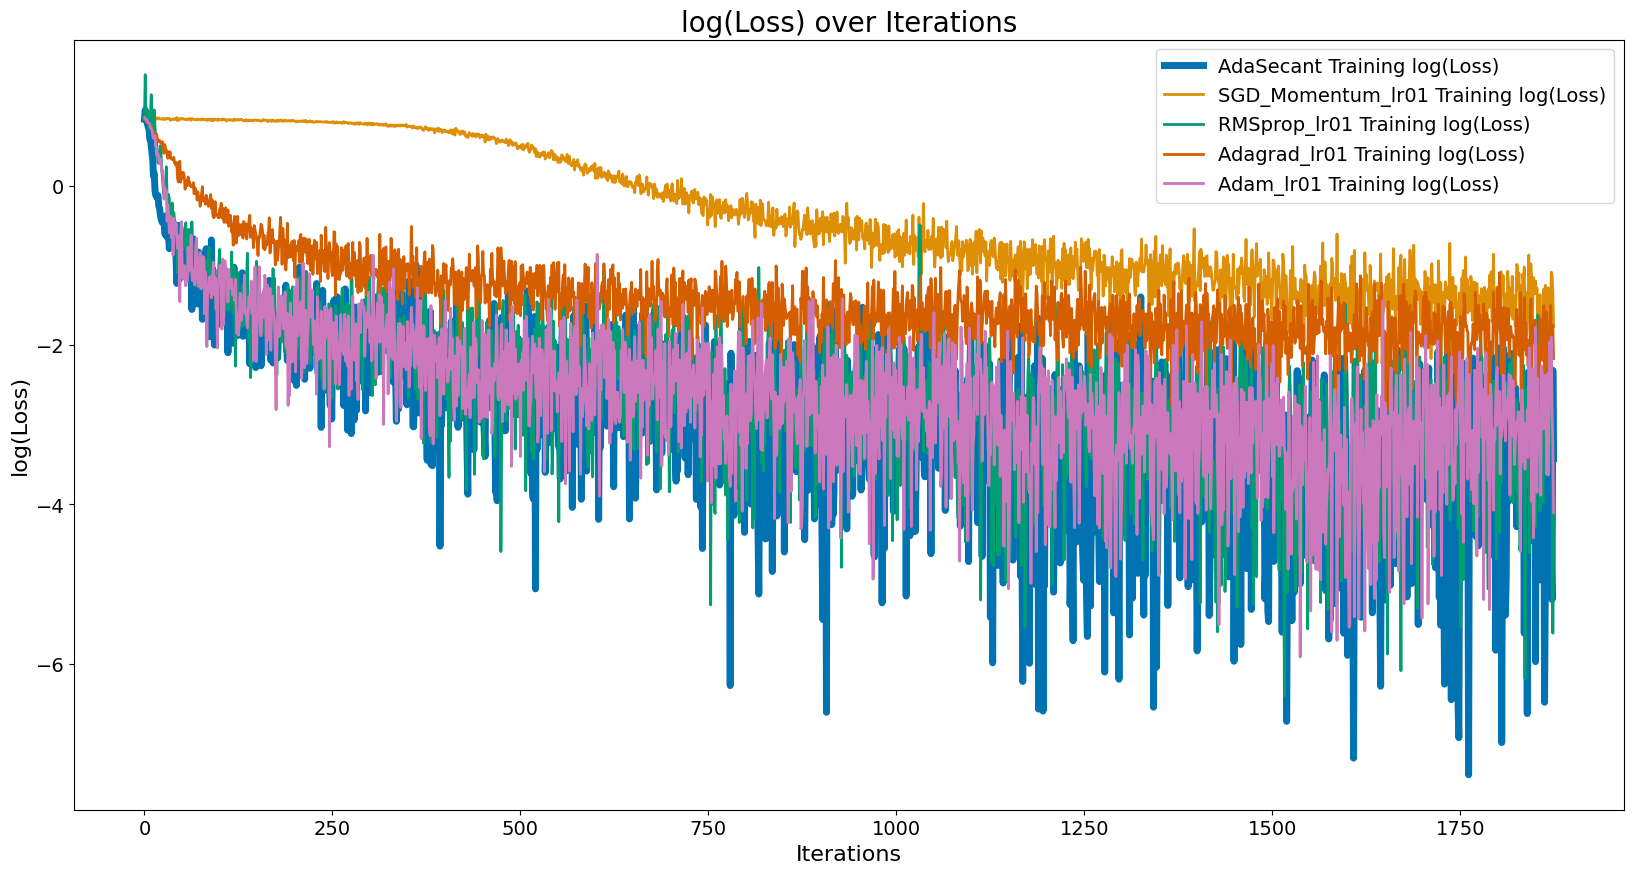

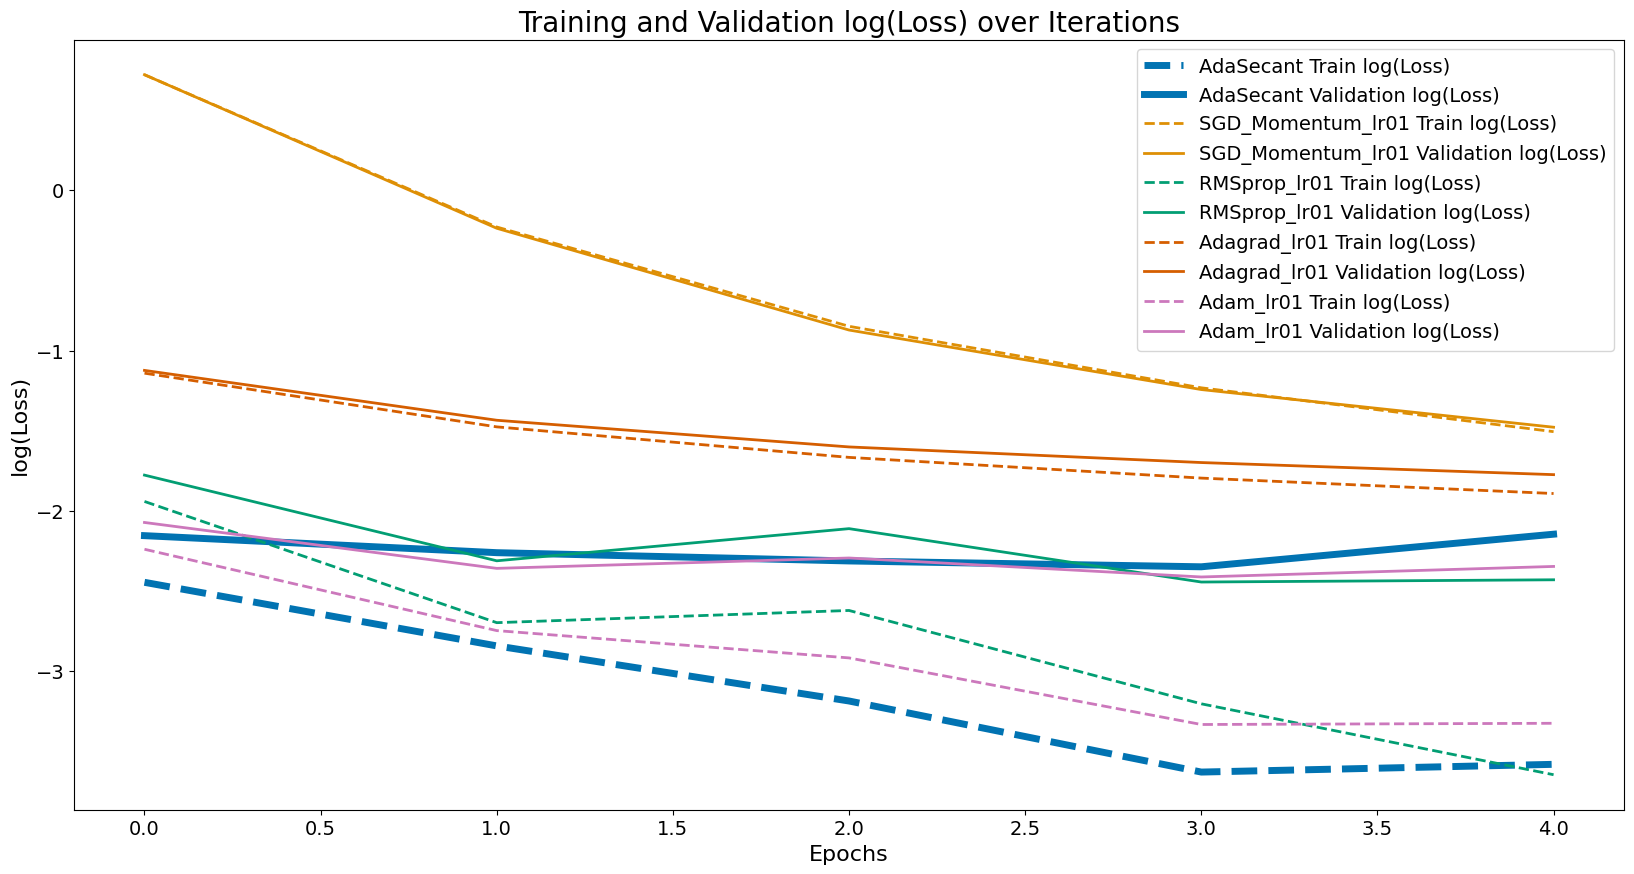

Metric of the model with AdaSecant optimizer on the test set: 97.70
Metric of the model with SGD_Momentum_lr01 optimizer on the test set: 93.50
Metric of the model with RMSprop_lr01 optimizer on the test set: 97.87
Metric of the model with Adagrad_lr01 optimizer on the test set: 95.34
Metric of the model with Adam_lr01 optimizer on the test set: 97.56


In [3]:
from models.MaxoutMinstNet import MaxoutNet
from torchvision import datasets, transforms

set_seed(45)


experiment_path = "./experiments/mnist_experiment"
if not os.path.exists(experiment_path):
    os.makedirs(experiment_path)


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])


train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)


criterion = nn.CrossEntropyLoss()

optimizers = {
    'AdaSecant': lambda params: AdaSecant(params, decay=0.95, use_adagrad=True, damping=1e-7, gamma_clip=1.8),
    'SGD_Momentum_lr01': lambda params: optim.SGD(params, lr=0.001, momentum=0.9),
    'RMSprop_lr01': lambda params: optim.RMSprop(params, lr=0.001),
    'Adagrad_lr01': lambda params: optim.Adagrad(params, lr=0.001),
    'Adam_lr01': lambda params: optim.Adam(params, lr=0.001),
}

manager = TrainingManager(MaxoutNet, criterion, optimizers, train_loader, val_loader, test_loader, num_epochs=5)
manager.train()
manager.plot_loss(experiment_path)
manager.plot_train_val_loss(experiment_path)
trained_models = manager.models
metrics = manager.calculate_metrics(experiment_path)


Training with optimizer: AdaSecant
Epoch [1/25], Train Loss: 0.6625, Val Loss: 0.4515
Epoch [2/25], Train Loss: 0.4527, Val Loss: 0.4064
Epoch [3/25], Train Loss: 0.3778, Val Loss: 0.3874
Epoch [4/25], Train Loss: 0.3611, Val Loss: 0.3741
Epoch [5/25], Train Loss: 0.3500, Val Loss: 0.3656
Epoch [6/25], Train Loss: 0.3426, Val Loss: 0.3617
Epoch [7/25], Train Loss: 0.3358, Val Loss: 0.3559
Epoch [8/25], Train Loss: 0.3302, Val Loss: 0.3480
Epoch [9/25], Train Loss: 0.3258, Val Loss: 0.3457
Epoch [10/25], Train Loss: 0.3238, Val Loss: 0.3411
Epoch [11/25], Train Loss: 0.3177, Val Loss: 0.3367
Epoch [12/25], Train Loss: 0.3162, Val Loss: 0.3334
Epoch [13/25], Train Loss: 0.3116, Val Loss: 0.3297
Epoch [14/25], Train Loss: 0.3122, Val Loss: 0.3291
Epoch [15/25], Train Loss: 0.3067, Val Loss: 0.3260
Epoch [16/25], Train Loss: 0.3045, Val Loss: 0.3235
Epoch [17/25], Train Loss: 0.3058, Val Loss: 0.3204
Epoch [18/25], Train Loss: 0.2997, Val Loss: 0.3181
Epoch [19/25], Train Loss: 0.3032, Va

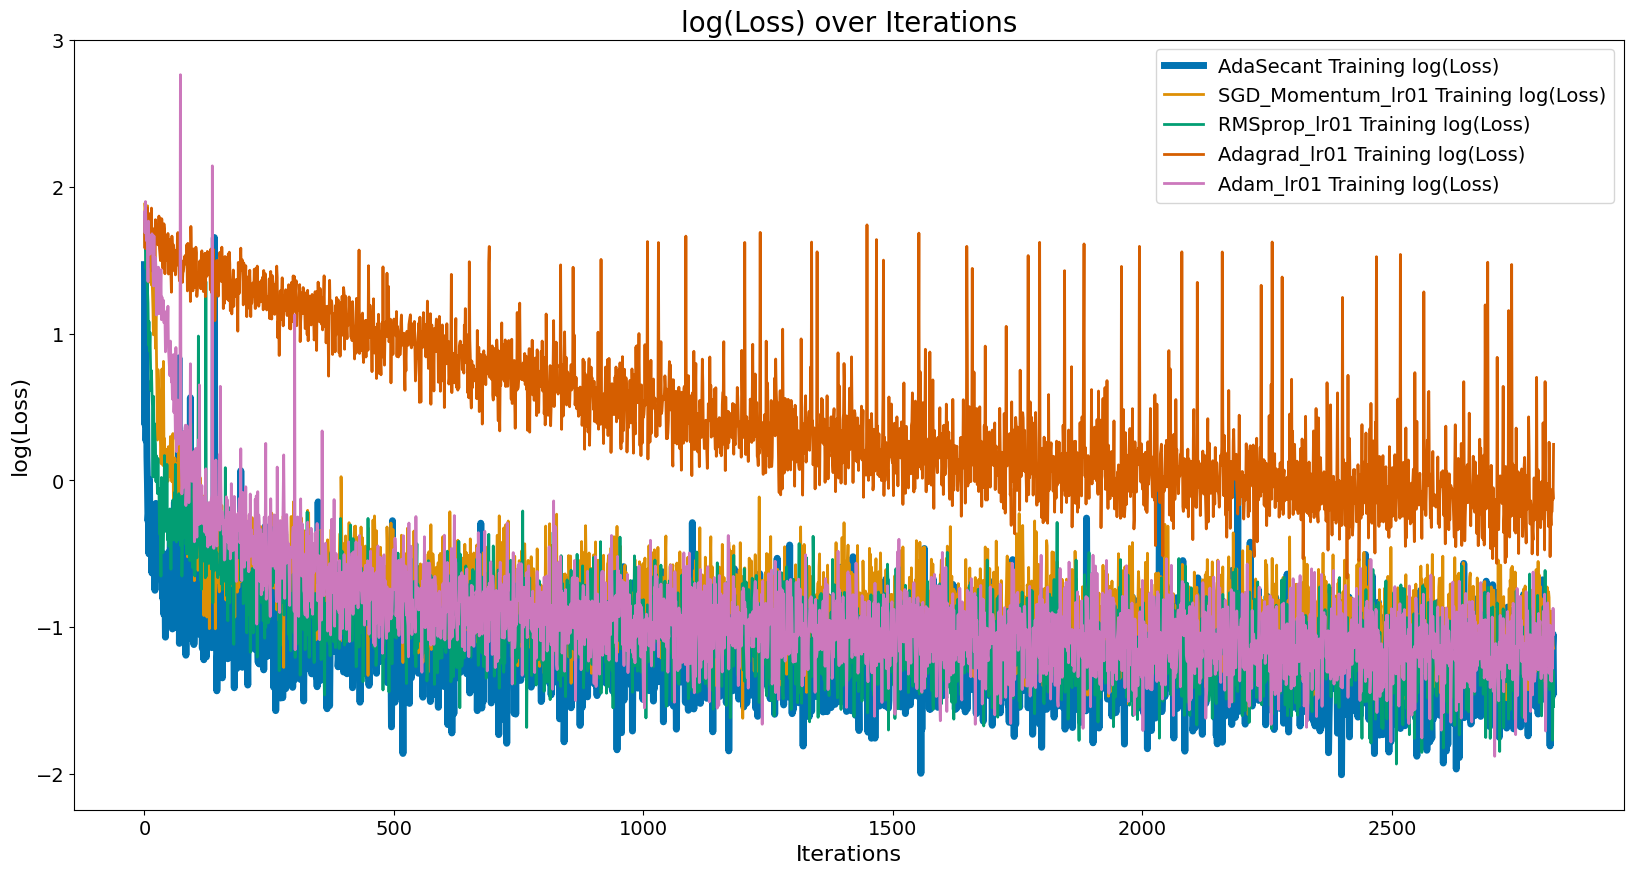

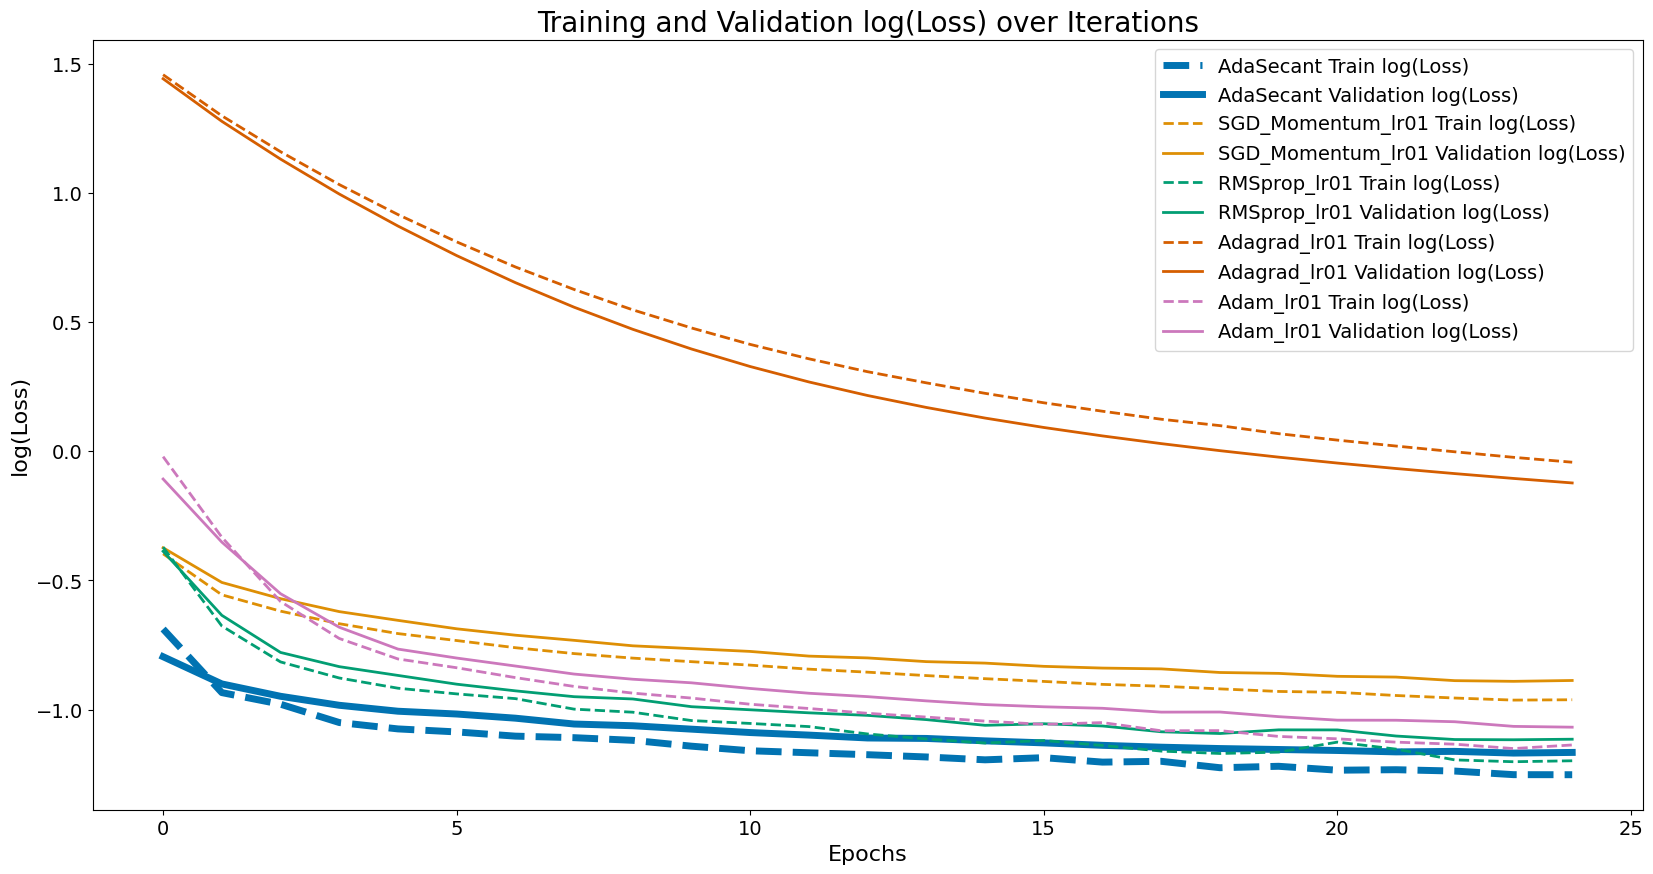

Metric of the model with AdaSecant optimizer on the test set: 0.28
Metric of the model with SGD_Momentum_lr01 optimizer on the test set: 0.36
Metric of the model with RMSprop_lr01 optimizer on the test set: 0.29
Metric of the model with Adagrad_lr01 optimizer on the test set: 0.98
Metric of the model with Adam_lr01 optimizer on the test set: 0.31


In [4]:
from models.RegressionNet import RegressionNet
from sklearn.datasets import fetch_california_housing

experiment_path = "./experiments/california_experiment"
if not os.path.exists(experiment_path):
    os.makedirs(experiment_path)

housing = fetch_california_housing()
X = housing.data
y = housing.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

criterion = nn.MSELoss()

optimizers = {
    'AdaSecant': lambda params: AdaSecant(params, decay=0.95, use_adagrad=True, damping=1e-7, gamma_clip=1.8),
    'SGD_Momentum_lr01': lambda params: optim.SGD(params, lr=0.001, momentum=0.9),
    'RMSprop_lr01': lambda params: optim.RMSprop(params, lr=0.001),
    'Adagrad_lr01': lambda params: optim.Adagrad(params, lr=0.001),
    'Adam_lr01': lambda params: optim.Adam(params, lr=0.001),
}

manager = TrainingManager(lambda: RegressionNet(X.shape[1]), criterion, optimizers, train_loader, val_loader, test_loader, num_epochs=25)


manager.train()

manager.plot_loss(experiment_path)
manager.plot_train_val_loss(experiment_path)
trained_models = manager.models
metrics = manager.calculate_metrics(experiment_path)
